# Teoretický základ
Chceme nájsť riešenie diferenciálnej rovnice<p/>
$$ a_2 y''(t) + a_1 y'(t) + a_0 y(t) = f(t), \mbox{ ak máme zadané počiatočné hodnoty }
y(0), y'(0)\ \mbox{ v čase } t = 0.$$<p/>
Nech $Y(s)$ je Laplaceov obraz funkcie $y(t)$, potom pre obrazy prvej a druhej derivácie
$$ y'(t) \rightarrow s Y(s) - y(0),\quad y''(t) \rightarrow s^2 Y(s) - s\, y(0) - y'(0).$$<p/>
Ak nájdeme aj obraz pravej strany $f(t) \rightarrow F(s)$, vieme celú rovnicu pretransformovať. Z tejto rovnice ľahko
vyjadríme obraz $Y(s)$ riešenia a pomocou inverznej transformácie nájdeme riešenie $y(t)$ rovnice v časovej oblasti, vyhovujúce zadaným podmienkam.

In [ ]:
import sympy
from sympy import symbols, init_printing, Function, Rational, plot, exp, sin, cos, apart, diff
from sympy import laplace_transform as LT,inverse_laplace_transform as ILT, latex, solve
from IPython.display import HTML
from laplace_spoj import plot_riesenie
y,Y = symbols("y,Y", cls=Function)
t = symbols("t", positive=True)
s = symbols("s")
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.rc = {"figure.figsize":  (6.4,4.8)}
init_printing()

## Niekoľko príkladov
1. $\displaystyle{y'' + 2 y' + y = \sin t,\ y(0) = 0, y'(0) = -1}$
2. $\displaystyle{y'' - y' + y = e^{-t},\ y(0) = 0, y=(0) = 1}$
3. $\displaystyle{y'' -2 y' + 5 y = 1 - t,\ y(0) = y'(0) = 0}$
4. $\displaystyle{y'' + y = t e^{t} + 4 \sin 2t,\ y(0)=2, y'(0) = -1}$
5. $\displaystyle{y'' + 2 y' + 4 y = t \cos t,\ y(0)=-34/169, y'(0) = 25/169}$

### Riešenie, pr. 4

In [ ]:
# Zadanie:
a2,a1,a0 = 1,0,1   # koeficienty rovnice
y0, yd0 = 2,-1     # pociatocne podmienky
f = t*exp(t) + 4*sin(2*t)

In [ ]:
# obraz lavej strany
LS = a2*(s**2*Y(s) - s*y0 - yd0) + a1*(s*Y(s) -y0) + a0*Y(s)
LS

In [ ]:
# obraz pravej strany
F = LT(f,t,s,noconds=True)   # funkcia, nazov casovej premennej, nazov frekvencnej premennej
F

In [ ]:
# pre vypis transformovanej rovnice
rov_str = r"$\quad\displaystyle{%s = %s}$" %(latex(LS.collect(Y(s))), latex(F))

Transformovaná rovnica je: {{ rov_str }}<br/>
Ľahko z nej vyrátame $Y(s).$

In [ ]:
Ysol, = solve(LS - F,Y(s))
Ysol

Z tohto nám inverznú L-transformáciu nik len tak ľahko nevypočíta. Najskôr to upravíme na súčin, aby sme videli korene menovateľa.

In [ ]:
Ysol = Ysol.factor()
Ysol

Teraz urobíme rozklad na elementárne zlomky (to môžeme, je to podiel polynómov, stupeň čitateľa
je menší, ako stupeň menovateľa).

In [ ]:
Y_rozklad = apart(Ysol,s)
Y_rozklad

Potrebovali by sme dostať jednotlivé zlomky, ide to:

In [ ]:
Zlomky = Y_rozklad.as_coefficients_dict()
Zlomky

Vidíme, aké sú zlomky a s akým koeficientami sa v ```Y_rozklad``` vyskytujú. Pre každý zlomok urobíme inverznú 
L-transformáciu (funkcia ```ILT```), vynásobime príslušným koeficientom a pričítame k výsledku ```y_ries```. 

In [ ]:
y_ries = 0
for zlom in Zlomky:
    coef = Zlomky[zlom]
    y_zlom = ILT(zlom,s,t)
    y_ries = y_ries + coef*y_zlom
del zlom # aby to nerobilo galibu    
# pre pekny vypis
ries_str = r"$\ \ \displaystyle{y(t) = %s}$" %latex(y_ries)

Riešenie rovnice, vyhovujúce podmienkam je {{ ries_str }}

__Úlohy pre lepšie pochopenie__ 
1. Ručne vyriešte rovnicu pre $Y(s)$
2. Napíšte si tvar rozkladu na elementárne zlomky pre $Y(s)$
3. Pre každý elementárny zlomok urobte inverznú L-transformáciu osobitne.
4. Vyriešte ostatné príklady zhora.

## Príklad, čo sme mali met. neuč. koeficientov aj variáciou konštánt
Riešme rovnicu<p/>
$$y'' + 2 y' + 4 y = t \cos t,\ y(0)=\frac{-34}{169},\ y'(0) = \frac{25}{169}$$<p/>
Pri týchto počiatočných podmienkach nám vyjde to riešenie, čo sme predtým mali ako $y_p$.

In [ ]:
# Zadanie:
a2,a1,a0 = 1,2,4   # koeficienty rovnice
# presne zlomky sa musia zadavat cez funkciu Rational
y0, yd0 = Rational(-34,169), Rational(25,169) # pociatocne podmienky

f = t*cos(t)

In [ ]:
# Obrazy lavej a pravej strany
LS = a2*(s**2*Y(s) - s*y0 - yd0) + a1*(s*Y(s) -y0) + a0*Y(s)
F = LT(f,t,s,noconds=True)
LS,F

In [ ]:
# Vyriesenie Y(s), rozklad na elem. zlomky
Ysol, = solve(LS - F,Y(s))
Ysol = Ysol.factor()
Y_rozklad = apart(Ysol,s)
Ysol, Y_rozklad

In [ ]:
# zistenie jednotlivych zlomkov a koeficientov
Zlomky = Y_rozklad.as_coefficients_dict()
Zlomky

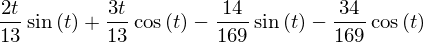

In [32]:
# Urcenie riesenia y(t)
y_ries = 0
for zlom in Zlomky:
    coef = Zlomky[zlom]
    y_zlom = ILT(zlom,s,t)
    y_ries = y_ries + coef*y_zlom
del zlom    
# pre pekny vypis
ries_str = r"$\ \ \displaystyle{y(t) = %s}$" %latex(y_ries)

Riešenie je {{ ries_str }}<p/>
Vyskúšame, či sú splnené poč. podmienky.

In [ ]:
y_ries.subs(t,0), diff(y_ries,t).subs(t,0)